In [1]:
import os
import sys
from osgeo import ogr
os.environ['QT_QPA_PLATFORM'] = 'offscreen'
sys.path.insert(0,'C:/Program Files/QGIS 3.10/apps/qgis/python')
from qgis.core import *
QgsApplication.setPrefixPath("C:/Program Files/QGIS 3.10/apps/qgis/lib", True) 
#from qgis.server import *
from qgis.gui import *
from qgis import processing

from qgis.PyQt.QtGui import QColor, QImage, QFont
from qgis.PyQt.QtCore import QSize, QBuffer, QIODevice

qgs = QgsApplication([], False)
qgs.initQgis()
print(QgsApplication.showSettings())

Application state:
QGIS_PREFIX_PATH env var:		C:/PROGRA~1/QGIS3~1.10/apps/qgis
Prefix:		C:/PROGRA~1/QGIS3~1.10/apps/qgis
Plugin Path:		C:/PROGRA~1/QGIS3~1.10/apps/qgis/plugins
Package Data Path:	C:/PROGRA~1/QGIS3~1.10/apps/qgis/.
Active Theme Name:	
Active Theme Path:	C:/PROGRA~1/QGIS3~1.10/apps/qgis/./resources/themes\\icons/
Default Theme Path:	:/images/themes/default/
SVG Search Paths:	C:/Program Files/QGIS 3.10/apps/qgis/lib/./svg/
		C:/PROGRA~1/QGIS3~1.10/apps/qgis/./svg/
		C:/Users/migue/AppData/Roaming/python3\profiles\default/svg/
User DB Path:	C:/PROGRA~1/QGIS3~1.10/apps/qgis/./resources/qgis.db
Auth DB Path:	C:/Users/migue/AppData/Roaming/python3\profiles\default/qgis-auth.db



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, HTML
from datetime import datetime


In [3]:
import wget
os.remove("Data/ECDC.csv")
url = "https://opendata.ecdc.europa.eu/covid19/casedistribution/csv"
wget.download(url, 'Data/ECDC.csv')

100% [..........................................................................] 1222134 / 1222134

'Data/ECDC.csv'

In [4]:
data=datetime.today().strftime('%d/%m/%Y')

confirmed_df = pd.read_csv('Data/ECDC.csv')
atual=confirmed_df.loc[confirmed_df['dateRep'] == data]

total=confirmed_df.groupby(['continentExp'])['cases', 'deaths'].sum().reset_index()
diario=atual.groupby(['continentExp'])['cases', 'deaths'].sum().reset_index()
total.to_csv(r'./Data/ECDC_continente.csv', index = False)

In [5]:
project = QgsProject.instance()
csv= "file:./Data/ECDC_continente.csv?delimiter=,"
csv_layer = QgsVectorLayer(csv, 'Mundo', 'delimitedtext')

if not csv_layer.isValid():
    print('Layer failed to load!')
else:
    project.addMapLayer(csv_layer)
    print("Sucess")

Sucess


In [6]:
path ="./Data/continent/continent.shp"
map_layer = QgsVectorLayer(path, 'Mundo', 'ogr')

if not map_layer.isValid():
    print("Failed to load the layer!")
else:
    project.addMapLayer(map_layer)
    print("Sucess")

Sucess


In [7]:
joinName = 'continentExp' #csv
targetName = 'CONTINENT'#shp
joinObject = QgsVectorLayerJoinInfo()
joinObject.setJoinFieldName(joinName) #csv
joinObject.setTargetFieldName(targetName) #shp
joinObject.setJoinLayerId(csv_layer.id())
joinObject.setUsingMemoryCache(True)
joinObject.setJoinLayer(csv_layer)
flag = map_layer.addJoin(joinObject)

for field in map_layer.fields():
    print(field.name()) 


CONTINENT
layer
path
Mundo_cases
Mundo_deaths


In [8]:
estilo = os.path.join(os.getcwd(), "Data\estilo_casesCont.qml")
print(estilo)
r=map_layer.loadNamedStyle( estilo, True)

D:\GitHub\Epidemiologia\Data\estilo_casesCont.qml


Gerar mapa com 2300 por 1109


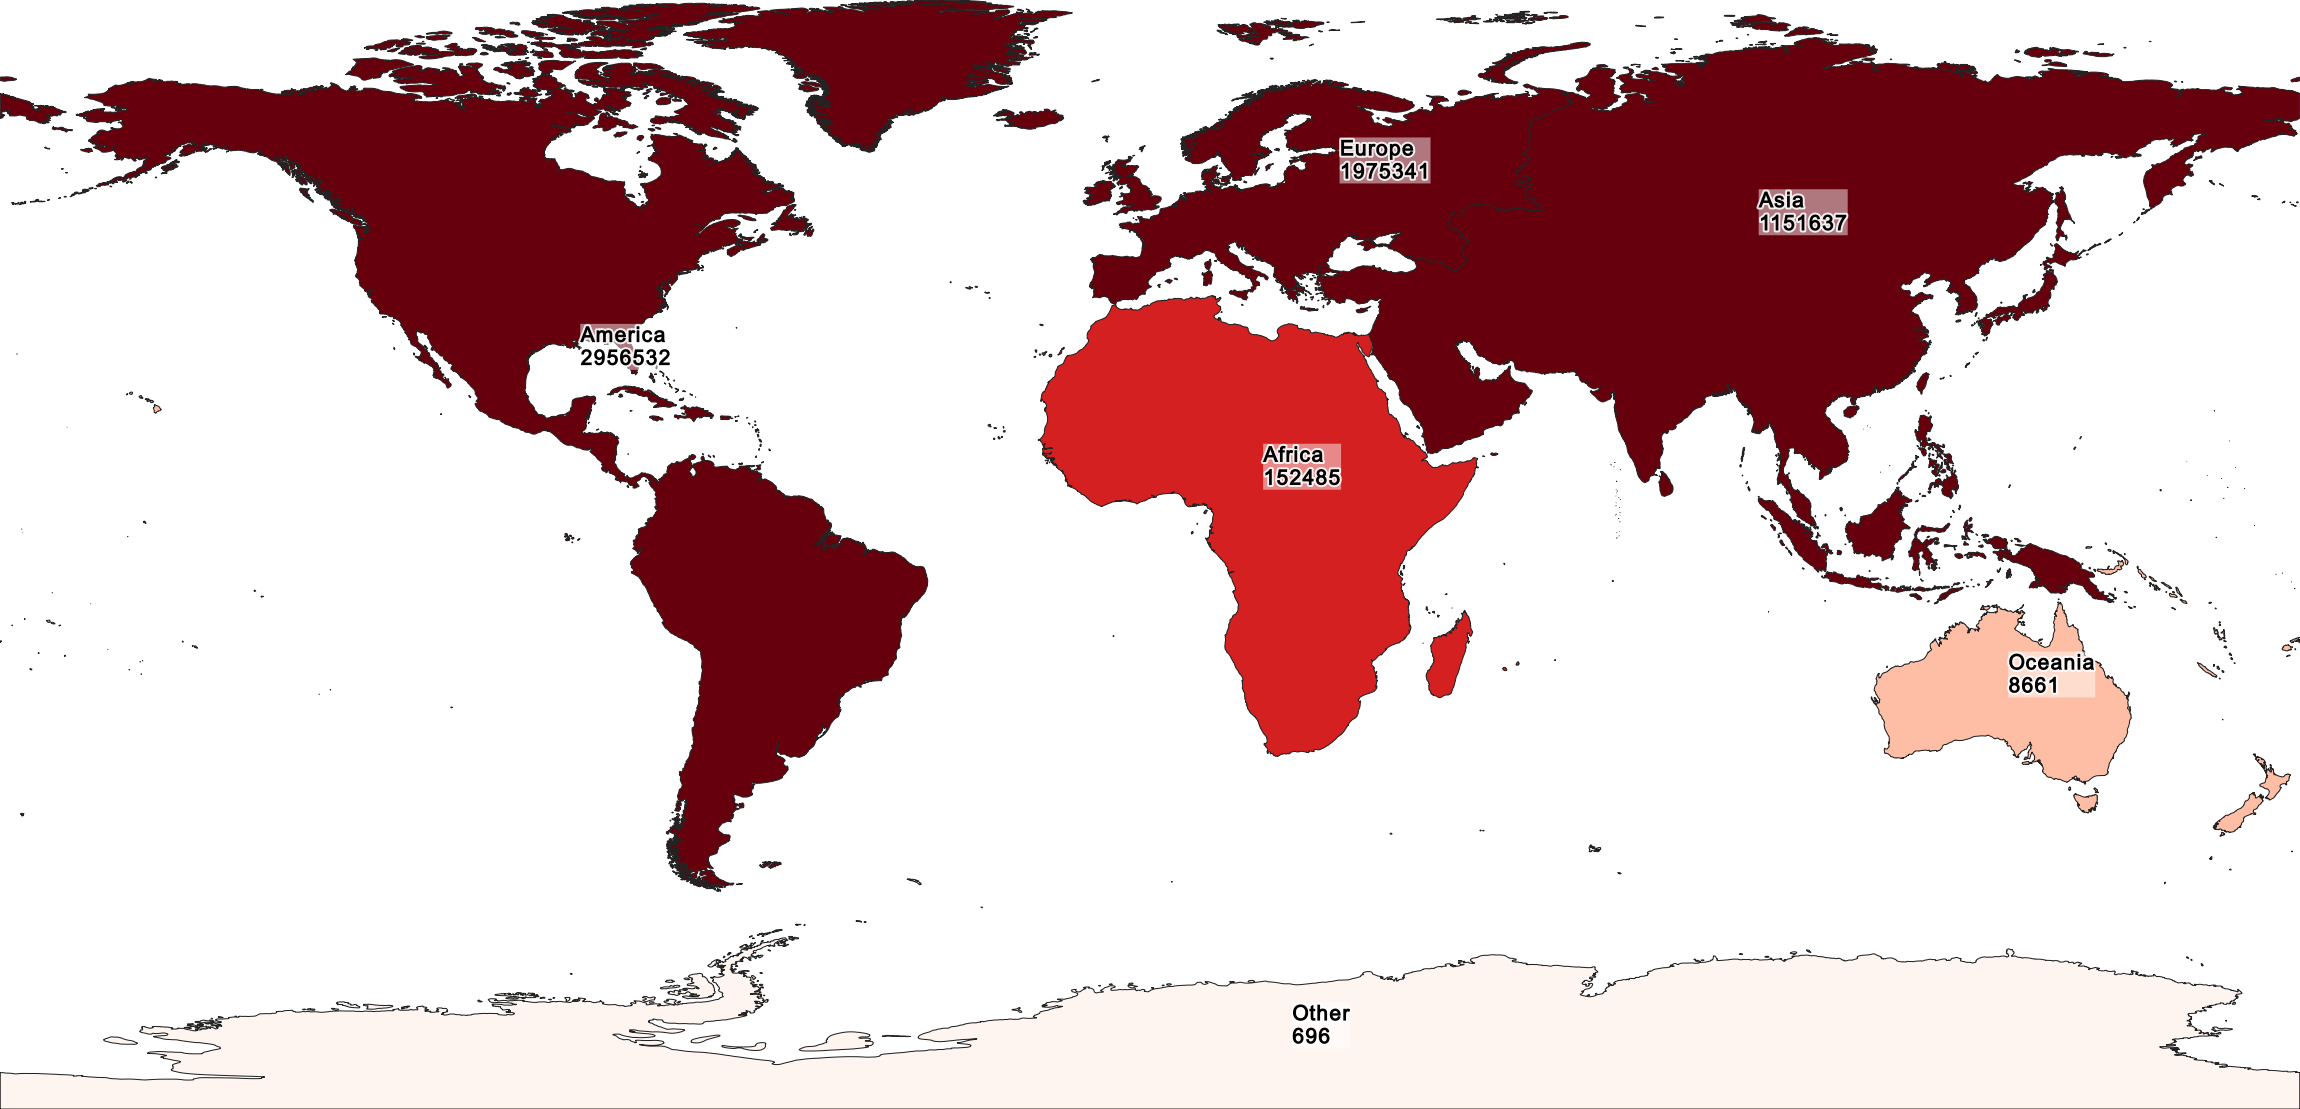

In [9]:
xt = map_layer.extent()
#print(xt)
width  = 2300
height = int(width*xt.height()/xt.width())
print("Gerar mapa com {} por {}".format(width, height))

options = QgsMapSettings()
options.setLayers([map_layer])
options.setBackgroundColor(QColor(255, 255, 255))
options.setOutputSize(QSize(width, height))
options.setExtent(xt)          
render = QgsMapRendererParallelJob(options)
render.start()
render.waitForFinished()
image = render.renderedImage()
imgbuf= QBuffer()
imgbuf.open( QIODevice.ReadWrite )
image.save( imgbuf,"PNG" )
image.save('figuras/ECDC_confirmados.png',"PNG" )
Image( imgbuf.data() )

In [10]:
estilo = os.path.join(os.getcwd(), "Data\estilo_deathCont.qml")
print(estilo)
r=map_layer.loadNamedStyle( estilo, True)

D:\GitHub\Epidemiologia\Data\estilo_deathCont.qml


Gerar mapa com 2300 por 1109


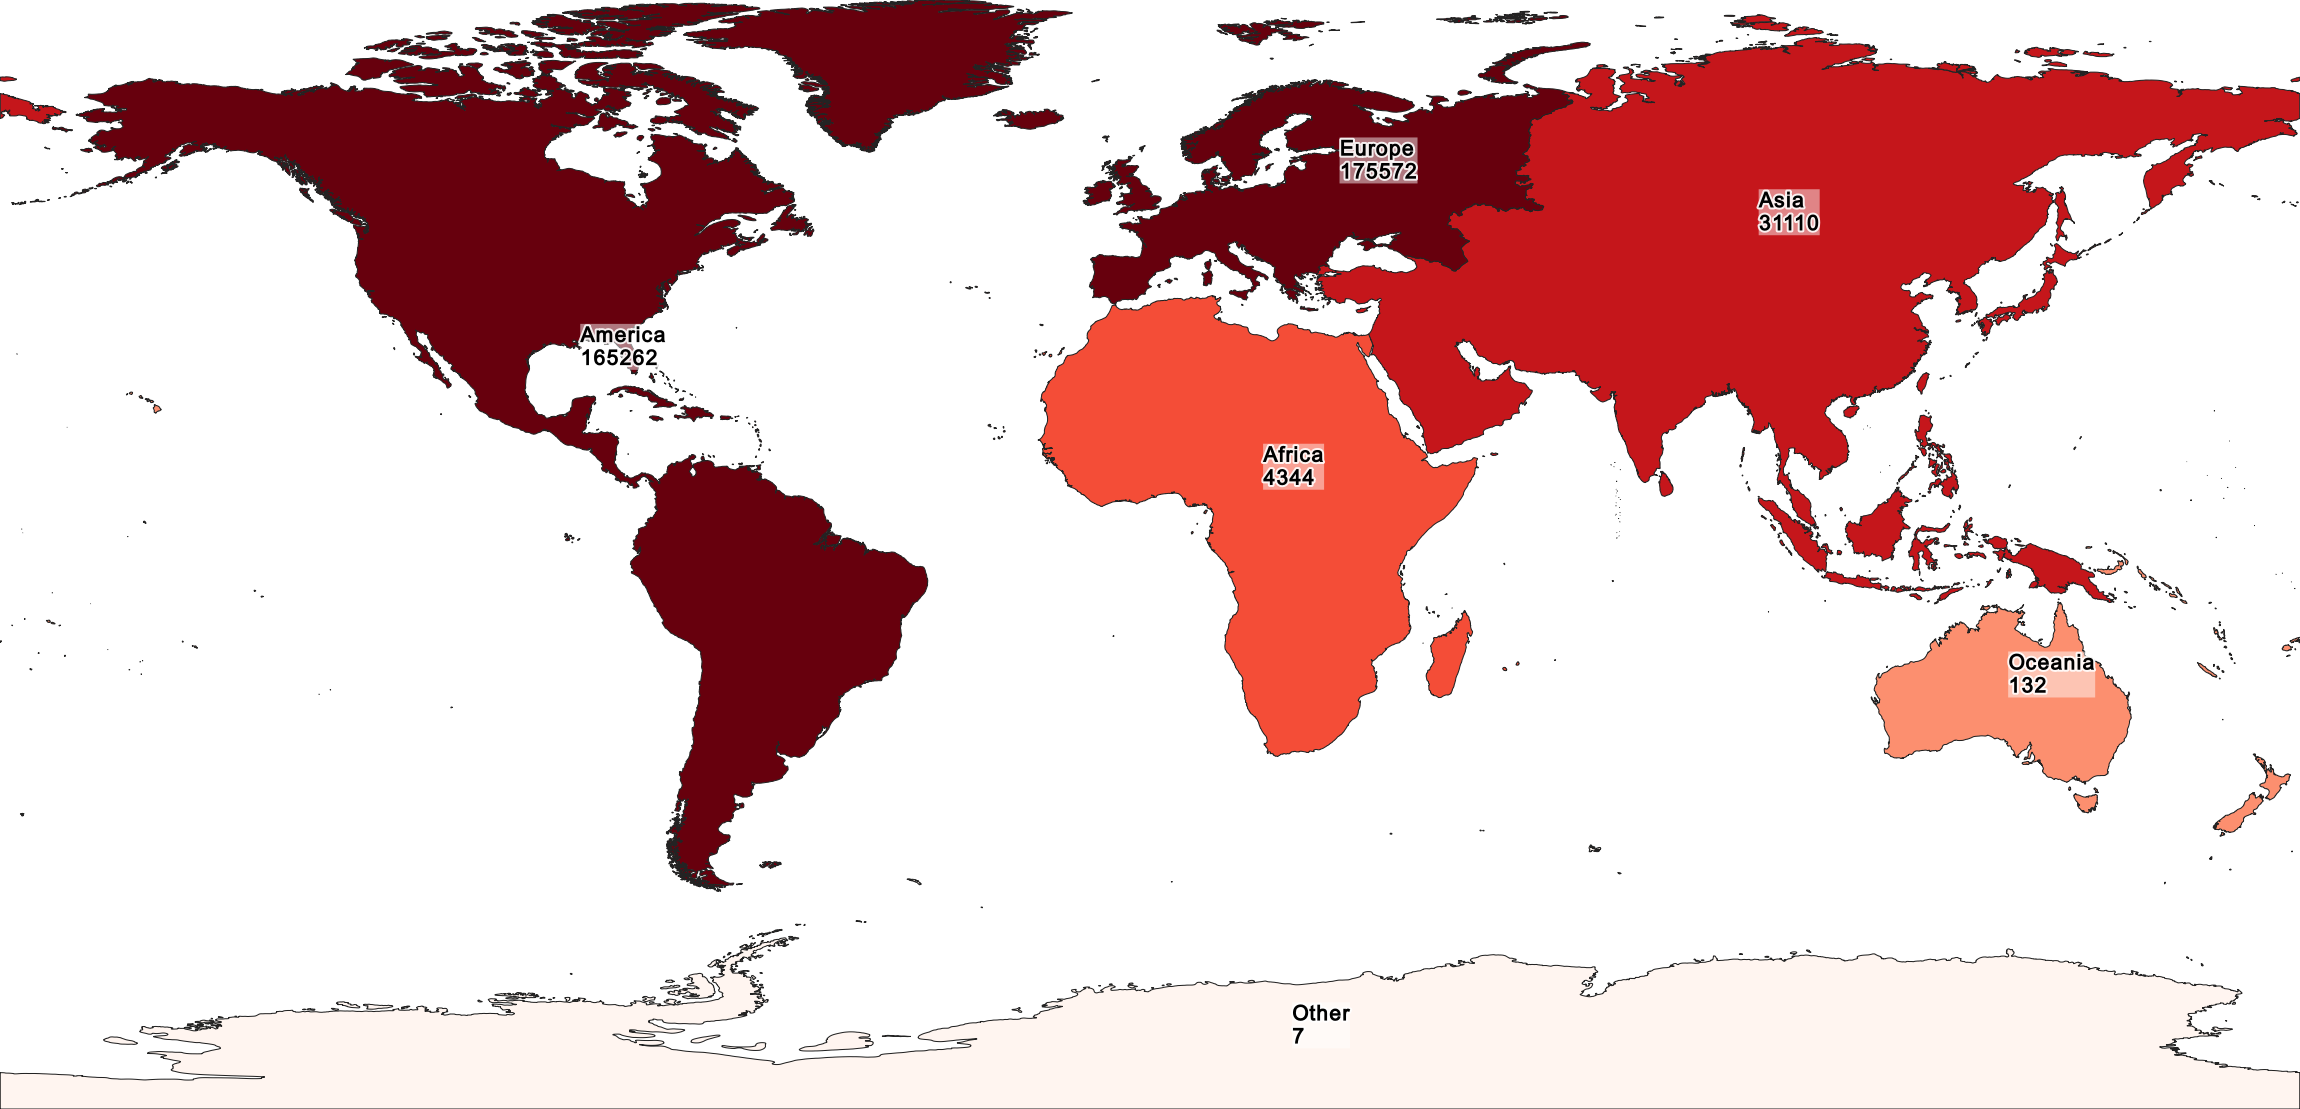

In [11]:
xt = map_layer.extent()
#print(xt)
width  = 2300
height = int(width*xt.height()/xt.width())
print("Gerar mapa com {} por {}".format(width, height))

options = QgsMapSettings()
options.setLayers([map_layer])
options.setBackgroundColor(QColor(255, 255, 255))
options.setOutputSize(QSize(width, height))
options.setExtent(xt)          
render = QgsMapRendererParallelJob(options)
render.start()
render.waitForFinished()
image = render.renderedImage()
imgbuf= QBuffer()
imgbuf.open( QIODevice.ReadWrite )
image.save( imgbuf,"PNG" )
image.save('figuras/ECDC_Mortes.png',"PNG" )
Image( imgbuf.data() )